In [3]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

In [40]:
df = pd.read_csv("../../../data_loading/hai-23_05/train1.csv", sep=';')

In [41]:
df.head()

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,...,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0,0,0,0
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,...,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0,0,0,0
2,2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,...,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0,0,0,0
3,2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,...,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0,0,0,0
4,2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,...,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0,0,0,0


In [42]:
df.dtypes

time           object
P1_B2004      float64
P1_B2016      float64
P1_B3004      float64
P1_B3005      float64
               ...   
P4_ST_TT01    float64
attack          int64
attack_P1       int64
attack_P2       int64
attack_P3       int64
Length: 64, dtype: object

In [43]:
df.columns

Index(['time', 'P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002',
       'P1_B4005', 'P1_B400B', 'P1_B4022', 'P1_FCV01D', 'P1_FCV01Z',
       'P1_FCV02D', 'P1_FCV02Z', 'P1_FCV03D', 'P1_FCV03Z', 'P1_FT01',
       'P1_FT01Z', 'P1_FT02', 'P1_FT02Z', 'P1_FT03', 'P1_FT03Z', 'P1_LCV01D',
       'P1_LCV01Z', 'P1_LIT01', 'P1_PCV01D', 'P1_PCV01Z', 'P1_PCV02D',
       'P1_PCV02Z', 'P1_PIT01', 'P1_PIT02', 'P1_TIT01', 'P1_TIT02', 'P2_24Vdc',
       'P2_Auto', 'P2_Emgy', 'P2_On', 'P2_SD01', 'P2_SIT01', 'P2_TripEx',
       'P2_VT01e', 'P2_VXT02', 'P2_VXT03', 'P2_VYT02', 'P2_VYT03', 'P3_LCP01D',
       'P3_LCV01D', 'P3_LH', 'P3_LL', 'P3_LT01', 'P4_HT_FD', 'P4_HT_LD',
       'P4_HT_PO', 'P4_HT_PS', 'P4_LD', 'P4_ST_FD', 'P4_ST_LD', 'P4_ST_PO',
       'P4_ST_PS', 'P4_ST_PT01', 'P4_ST_TT01', 'attack', 'attack_P1',
       'attack_P2', 'attack_P3'],
      dtype='object')

In [44]:
# Since attack column is aggregation of attack_P1, attack_P2 and attack_P3, we are dropping those three columns and using only attack col as label

col_to_drop = ['time','attack_P1', 'attack_P2', 'attack_P3']
df = df.drop(columns=col_to_drop)

In [45]:
labels = df['attack']

In [46]:
df = df.drop(columns=['attack'])

In [48]:
# Split the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(df, labels, test_size=0.2, random_state=42)

stream_size = test_data.shape[0]
# true_attack_indexes = test_labels[test_labels['label'] == 1].index.values

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_data, train_labels)

# Make predictions on the test set
rf_model_predictions = rf_model.predict(test_data)

In [49]:
# Save the model to a file
joblib.dump(rf_model, '../../albert/model/random_forest_model.joblib')

['../../albert/model/random_forest_model.joblib']

In [50]:
print(rf_model_predictions)

[0 0 0 ... 0 0 0]


In [51]:
# Page-Hinkley Test Implementation
class PageHinkley:
    def __init__(self, min_instances=30, delta=0.005, threshold=50, alpha=1-0.0001):
        self.min_instances = min_instances
        self.delta = delta
        self.threshold = threshold
        self.alpha = alpha
        self.cum_sum = 0
        self.mean = 0
        self.n = 0

    def add_element(self, value):
        if self.n < self.min_instances:
            self.n += 1
            self.mean = self.mean + (value - self.mean) / self.n
            return False

        self.cum_sum = max(0, self.alpha * self.cum_sum + (value - self.mean - self.delta))

        self.mean = self.mean + (value - self.mean) / self.n
        self.n += 1

        if self.cum_sum > self.threshold:
            self.cum_sum = 0
            return True

        return False

In [52]:
# Initialize Page-Hinkley detector
page_hinkley = PageHinkley(min_instances=30, delta=0.005, threshold=50, alpha=1-0.0001)


In [53]:
print(test_labels.shape)

(61920,)


In [54]:
print(test_labels)

209649    0
192094    0
108535    0
220258    0
172977    0
         ..
165574    0
119995    0
154949    0
41643     0
181600    0
Name: attack, Length: 61920, dtype: int64


In [57]:
# Perform change detection on the test set
change_points = []
accuracies = []

for i in range(len(test_data)):
    x_i = test_data.iloc[i:i + 1]
    y_i = test_labels.iloc[i]
    # Predict using the RandomForest model
    pred = rf_model.predict(x_i)

    # Check for a change point
    if page_hinkley.add_element(pred == y_i):
        change_points.append(i)

    # Calculate accuracy at each step
    accuracy = rf_model.score(test_data.iloc[:i + 1], test_labels.iloc[:i + 1])
    accuracies.append(accuracy)

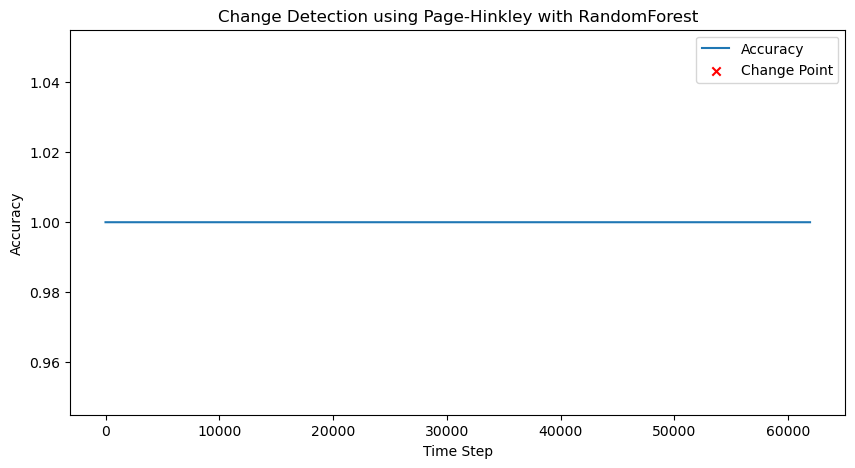

In [58]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(len(test_data)), accuracies, label='Accuracy')
plt.scatter(change_points, [accuracies[i] for i in change_points], color='red', marker='x', label='Change Point')
plt.title('Change Detection using Page-Hinkley with RandomForest')
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.legend()
plt.show()